In [51]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload 

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [52]:
from collections import defaultdict
import numpy as np
import scipy.stats as stats
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd

from bgspy.theory import bgs_segment, bgs_rec, bgs_segment_sc16
from bgspy.utils import signif

In [3]:
plt.rcParams['figure.figsize'] = [8, 4]
plt.rcParams['figure.dpi'] = 200
plt.style.use('./buffalo.mplstyle')

In [278]:
def group_means(d):
    d_ave = d.groupby(['key']).mean().reset_index()
    d_var = d.groupby(['key'])['y'].var().reset_index()
    d_var = d_var.rename(columns={'y': 'y_var'})
    d_grp = pd.concat((d_ave, d_var), axis=1).reset_index()
    return d_grp.sort_values(['sh', 'mu'])

def load_validation(file):
    vda = np.load(file, allow_pickle=True)
    vd = pd.DataFrame(vda['X'], columns=vda['features'])
    vdy = pd.DataFrame(vda['y'], columns=vda['targets'])
    vd['y'] = vdy['Bhat'].astype('float')
    vd['key'] = vda['keys']
    vd['theory'] = bgs_segment(vd['mu'], vd['sh'], vd['L'], vd['rbp'], vd['rf'])
    vd['Vf'] = vdy['Vf'].astype('float')
    vd['load'] = vdy['load']
    vd['nsubs'] = vdy['nsubs']
    vd['U'] = vd['L'] * vd['mu']
    vd['R'] = [np.max(x) / len(x) for x in vd['nsubs']]
    return vd


## Validation

In [279]:
vd = load_validation('../data/slim_sims/validate/validate.npz')

In [280]:
vg = vd.groupby(['key']).mean().reset_index()

In [281]:
vg

,key,mu,sh,L,rbp,rf,rep,y,theory,Vf,U,R
0,validate_N1000_mu1e-08_sh0.0001_rf1e-09_rbp1e-...,1.000000e-08,0.00010,10000.0,1.000000e-08,1.000000e-09,4999.5,0.993561,0.606520,3.693041e-09,0.00010,4.951000e-05
1,validate_N1000_mu1e-08_sh0.0002_rf1e-09_rbp1e-...,1.000000e-08,0.00020,10000.0,1.000000e-08,1.000000e-09,4999.5,0.991466,0.716517,1.382924e-08,0.00010,3.931000e-05
2,validate_N1000_mu1e-08_sh0.001_rf1e-09_rbp1e-0...,1.000000e-08,0.00100,10000.0,1.000000e-08,1.000000e-09,4999.5,0.965246,0.913093,1.801830e-07,0.00010,6.150000e-06
3,validate_N1000_mu1e-08_sh0.002_rf1e-09_rbp1e-0...,1.000000e-08,0.00200,10000.0,1.000000e-08,1.000000e-09,4999.5,0.966316,0.953493,3.982639e-07,0.00010,3.500000e-07
4,validate_N1000_mu1e-08_sh0.01_rf1e-09_rbp1e-08...,1.000000e-08,0.01000,10000.0,1.000000e-08,1.000000e-09,4999.5,0.997591,0.990147,1.985319e-06,0.00010,0.000000e+00
5,validate_N1000_mu1e-08_sh0.02_rf1e-09_rbp1e-08...,1.000000e-08,0.02000,10000.0,1.000000e-08,1.000000e-09,4999.5,0.997393,0.995037,4.068977e-06,0.00010,0.000000e+00
6,validate_N1000_mu1e-08_sh0.1_rf1e-09_rbp1e-08_...,1.000000e-08,0.10000,10000.0,1.000000e-08,1.000000e-09,4999.5,1.001404,0.999001,2.009529e-05,0.00010,0.000000e+00
7,validate_N1000_mu1e-08_sh0.2_rf1e-09_rbp1e-08_...,1.000000e-08,0.20000,10000.0,1.000000e-08,1.000000e-09,4999.5,1.009912,0.999500,3.957901e-05,0.00010,0.000000e+00
8,validate_N1000_mu1e-08_sh0.5_rf1e-09_rbp1e-08_...,1.000000e-08,0.50000,10000.0,1.000000e-08,1.000000e-09,4999.5,1.001203,0.999800,9.893746e-05,0.00010,0.000000e+00
9,validate_N1000_mu1e-08_sh1e-05_rf1e-09_rbp1e-0...,1.000000e-08,0.00001,10000.0,1.000000e-08,1.000000e-09,4999.5,1.002729,0.402927,3.892624e-11,0.00010,5.999000e-05


In [427]:
@np.vectorize
def kmin(theta, N, ploidy=2):
    """
    This is the k of Gessler (1995), which is the smallest 
    fitness class of mutations with ≥ 1 occupents for a population
    of N gametes.
    """
    x = np.arange(np.ceil(theta)+1).astype(int)
    nexp = stats.poisson.pmf(x, theta)*ploidy*N
    if not len(nexp) or not np.any(nexp >= 1):
        return 0
    return x[np.min(np.where(nexp >= 1))]

def best_class(theta, N, k=None, ploidy=1):
    if k is None:
        k = kmin(theta, N, ploidy)
    x = list(range(k, 10000))
    nexp = np.array([stats.poisson.pmf(b, theta, loc=k)*ploidy*N for b in range(k, int(theta))])
    print(nexp)
    return int(k), x[np.min(np.where(nexp >= 1))] 

def ratchet(theta, s, N):
    k = kmin(theta, N)
    b = best_class(theta, N)
    t = b-k
    return s*(k-t)

In [428]:
theta = 10
k = kmin(theta, 1e-5, 1000)

[stats.poisson.pmf(b, theta, loc=k)*N > 1 for b in range(0, 10)]

[False, False, True, True, True, True, True, True, True, True]

In [434]:
k, b = best_class(100, 1000)

s = 1-5
k-(b-k)

[3.72007598e-41 3.72007598e-39 1.86003799e-37 6.20012663e-36
 1.55003166e-34 3.10006331e-33 5.16677219e-32 7.38110313e-31
 9.22637891e-30 1.02515321e-28 1.02515321e-27 9.31957466e-27
 7.76631221e-26 5.97408632e-25 4.26720451e-24 2.84480301e-23
 1.77800188e-22 1.04588346e-21 5.81046366e-21 3.05813877e-20
 1.52906938e-19 7.28128278e-19 3.30967399e-18 1.43898869e-17
 5.99578622e-17 2.39831449e-16]


ValueError: zero-size array to reduction operation minimum which has no identity

/home/vsb/projects/bprime/bgspy/theory.py:45: RuntimeWarning: overflow encountered in exp
  start_T = (np.exp(2*sh*N) - 1)/(2*U*sh*N)
/home/vsb/projects/bprime/bgspy/theory.py:51: RuntimeWarning: overflow encountered in exp
  return [np.log((np.exp(2*sh*Ne) - 1)/(2*U*sh*Ne)) - np.log(T),
/home/vsb/projects/bprime/bgspy/theory.py:51: RuntimeWarning: invalid value encountered in double_scalars
  return [np.log((np.exp(2*sh*Ne) - 1)/(2*U*sh*Ne)) - np.log(T),
/home/vsb/projects/bprime/bgspy/theory.py:57: UserWarning: no solution found!
  warnings.warn("no solution found!")
/home/vsb/miniconda3/envs/bprime/lib/python3.8/site-packages/numpy/lib/function_base.py:2246: RuntimeWarning: invalid value encountered in func (vectorized)
  outputs = ufunc(*inputs)
/tmp/ipykernel_51622/1814200936.py:14: RuntimeWarning: divide by zero encountered in true_divide
  T = 1/R
/home/vsb/projects/bprime/bgspy/theory.py:45: RuntimeWarning: overflow encountered in exp
  start_T = (np.exp(2*sh*N) - 1)/(2*U*sh*N)

(1e-08, 0.0001)

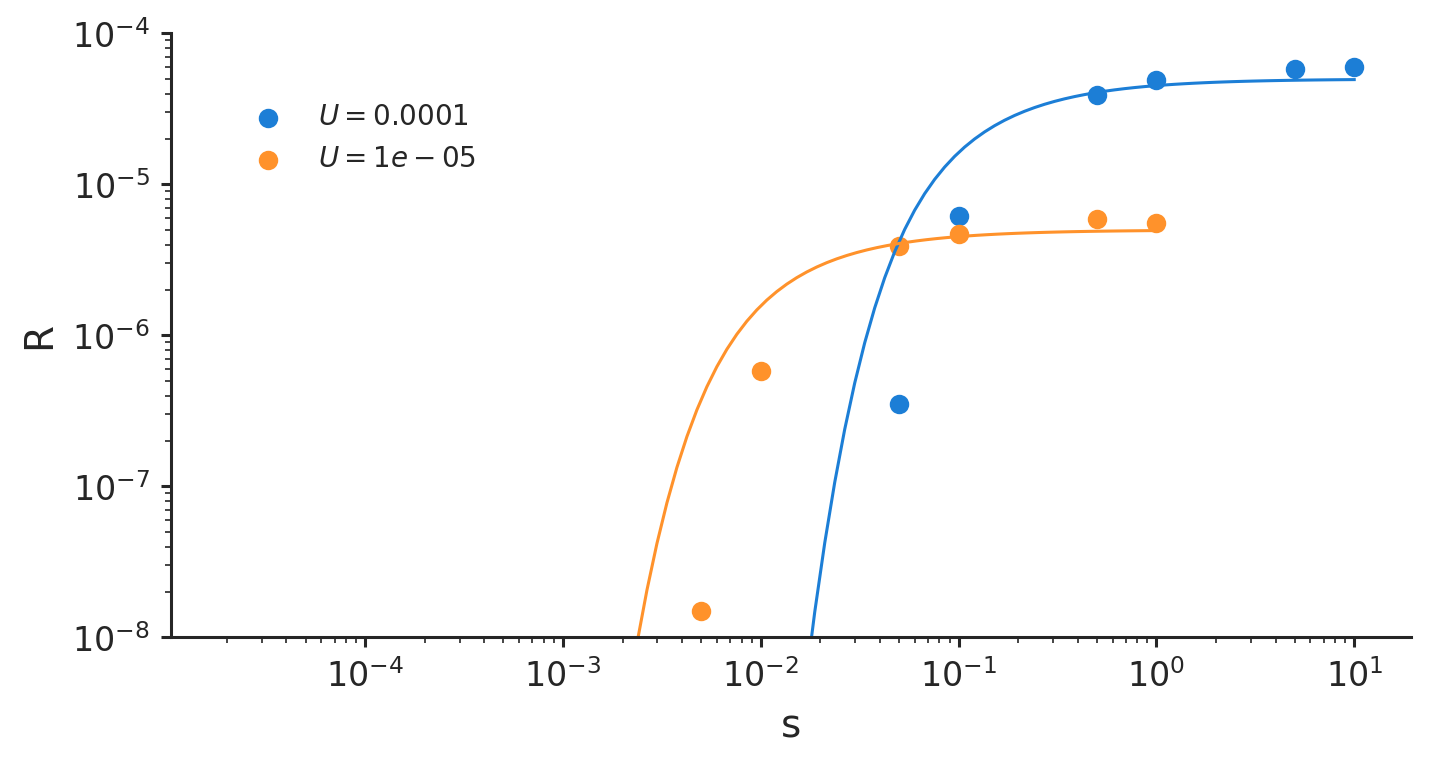

In [373]:
Us = [1e-4, 1e-5]

for U in Us:
    #plt.plot(sh, 2*(U * sh - sh/bgs_segment_sc16(U, sh, 1, rf, N, return_both=True)[0]))
    vga = vg.loc[vg['U'] == U]
    plt.scatter(U/vga['sh'], vga['R'], label=f"$U = {U}$")
    #plt.plot(sh, 2*(U * sh - sh/bgs_segment_sc16(U, sh, 1, rf, N, return_both=True)[0]))
    lines = plt.plot(U/sh, 0.5/bgs_segment_sc16(U, sh, 1, 1e-9, 1000, return_both=True)[0])
    
    R = vga['R'].values
    s = vga['sh'].values
    idx = np.argsort(s)
    s, R = s[idx], R[idx]
    T = 1/R
    #plt.plot(s, R, c=lines[0].get_color(), linestyle='dashed')
    
plt.ylabel("R")
plt.xlabel("s")
plt.legend()
plt.loglog()
plt.ylim(1e-8, 1e-4)

/home/vsb/projects/bprime/bgspy/theory.py:45: RuntimeWarning: overflow encountered in exp
  start_T = (np.exp(2*sh*N) - 1)/(2*U*sh*N)
/home/vsb/projects/bprime/bgspy/theory.py:51: RuntimeWarning: overflow encountered in exp
  return [np.log((np.exp(2*sh*Ne) - 1)/(2*U*sh*Ne)) - np.log(T),
/home/vsb/projects/bprime/bgspy/theory.py:51: RuntimeWarning: invalid value encountered in double_scalars
  return [np.log((np.exp(2*sh*Ne) - 1)/(2*U*sh*Ne)) - np.log(T),
/home/vsb/projects/bprime/bgspy/theory.py:57: UserWarning: no solution found!
  warnings.warn("no solution found!")
/home/vsb/miniconda3/envs/bprime/lib/python3.8/site-packages/numpy/lib/function_base.py:2246: RuntimeWarning: invalid value encountered in func (vectorized)
  outputs = ufunc(*inputs)
/tmp/ipykernel_51622/3937454775.py:14: RuntimeWarning: divide by zero encountered in true_divide
  T = 1/R
/home/vsb/projects/bprime/bgspy/theory.py:45: RuntimeWarning: overflow encountered in exp
  start_T = (np.exp(2*sh*N) - 1)/(2*U*sh*N)

(1e-08, 0.0001)

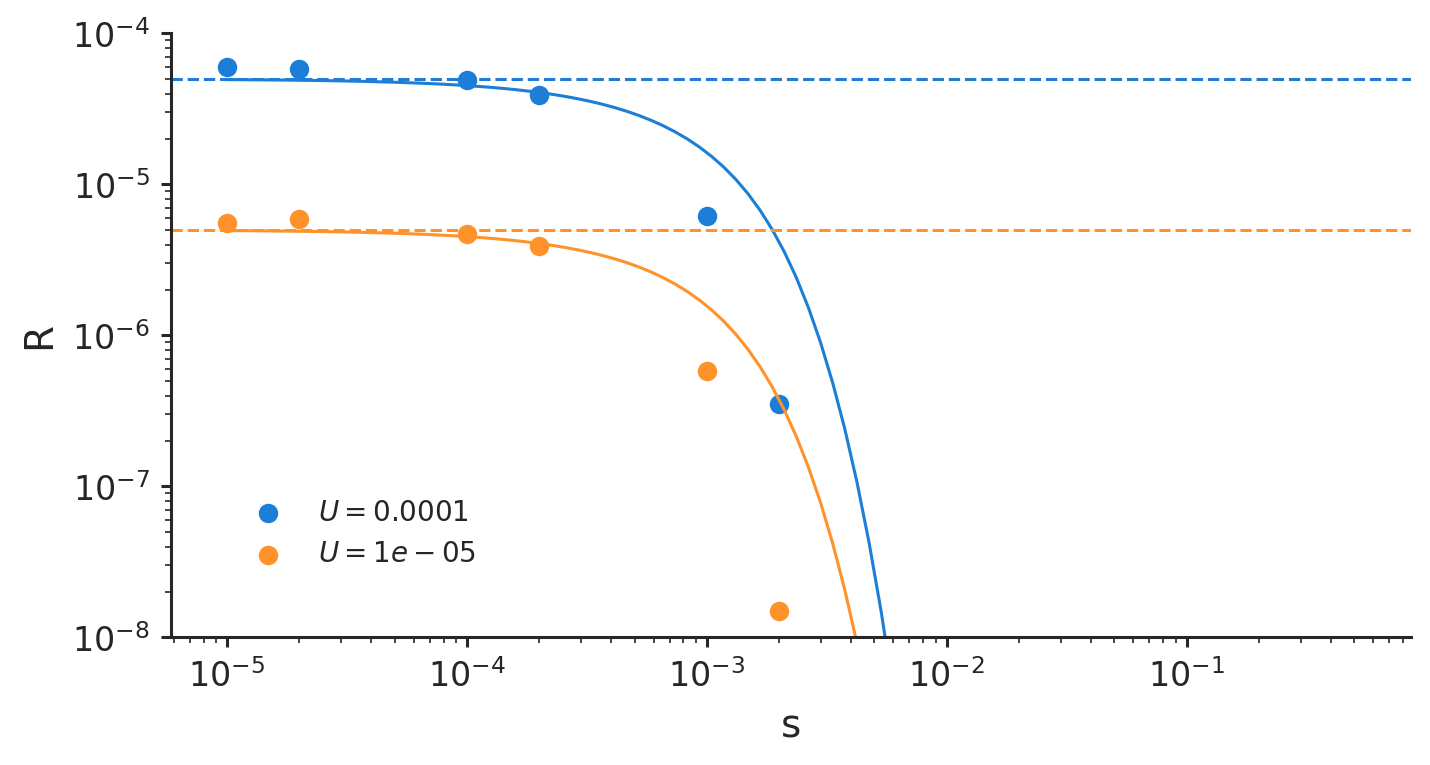

In [442]:
Us = [1e-4, 1e-5]

for U in Us:
    #plt.plot(sh, 2*(U * sh - sh/bgs_segment_sc16(U, sh, 1, rf, N, return_both=True)[0]))
    vga = vg.loc[vg['U'] == U]
    plt.scatter(vga['sh'], vga['R'], label=f"$U = {U}$")
    #plt.plot(sh, 2*(U * sh - sh/bgs_segment_sc16(U, sh, 1, rf, N, return_both=True)[0]))
    lines = plt.plot(sh, 0.5/bgs_segment_sc16(U, sh, 1, 1e-9, 1000, return_both=True)[0])
    
    R = vga['R'].values
    s = vga['sh'].values
    idx = np.argsort(s)
    s, R = s[idx], R[idx]
    T = 1/R
    #plt.plot(s, R, c=lines[0].get_color(), linestyle='dashed')
    plt.axhline(0.5*U, c=lines[0].get_color(), linestyle='dashed')
    
plt.ylabel("R")
plt.xlabel("s")
plt.legend()
plt.loglog()
plt.ylim(1e-8, 1e-4)

In [443]:
vd['sh'].unique()

array([1.e-03, 2.e-03, 2.e-04, 1.e-04, 5.e-01, 1.e-01, 2.e-05, 2.e-02,
       1.e-02, 1.e-05, 2.e-01])

In [450]:
np.logspace(-6, -1, 11)

array([1.00000000e-06, 3.16227766e-06, 1.00000000e-05, 3.16227766e-05,
       1.00000000e-04, 3.16227766e-04, 1.00000000e-03, 3.16227766e-03,
       1.00000000e-02, 3.16227766e-02, 1.00000000e-01])

[]

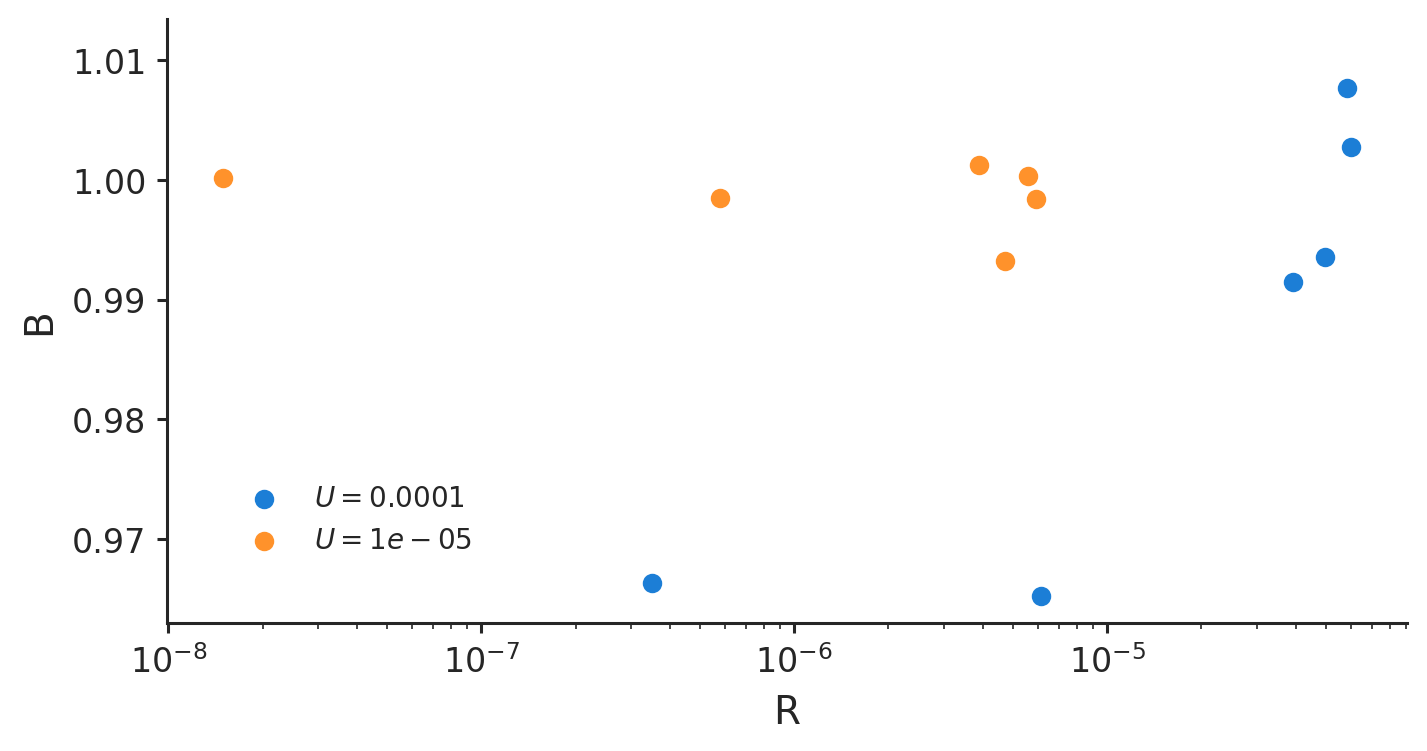

In [299]:
Us = [1e-4, 1e-5]

for U in Us:
    #plt.plot(sh, 2*(U * sh - sh/bgs_segment_sc16(U, sh, 1, rf, N, return_both=True)[0]))
    vga = vg.loc[vg['U'] == U]
    plt.scatter(vga['R'], vga['y'], label=f"$U = {U}$")

    
plt.ylabel("B")
plt.xlabel("R")
plt.legend()
plt.semilogx()

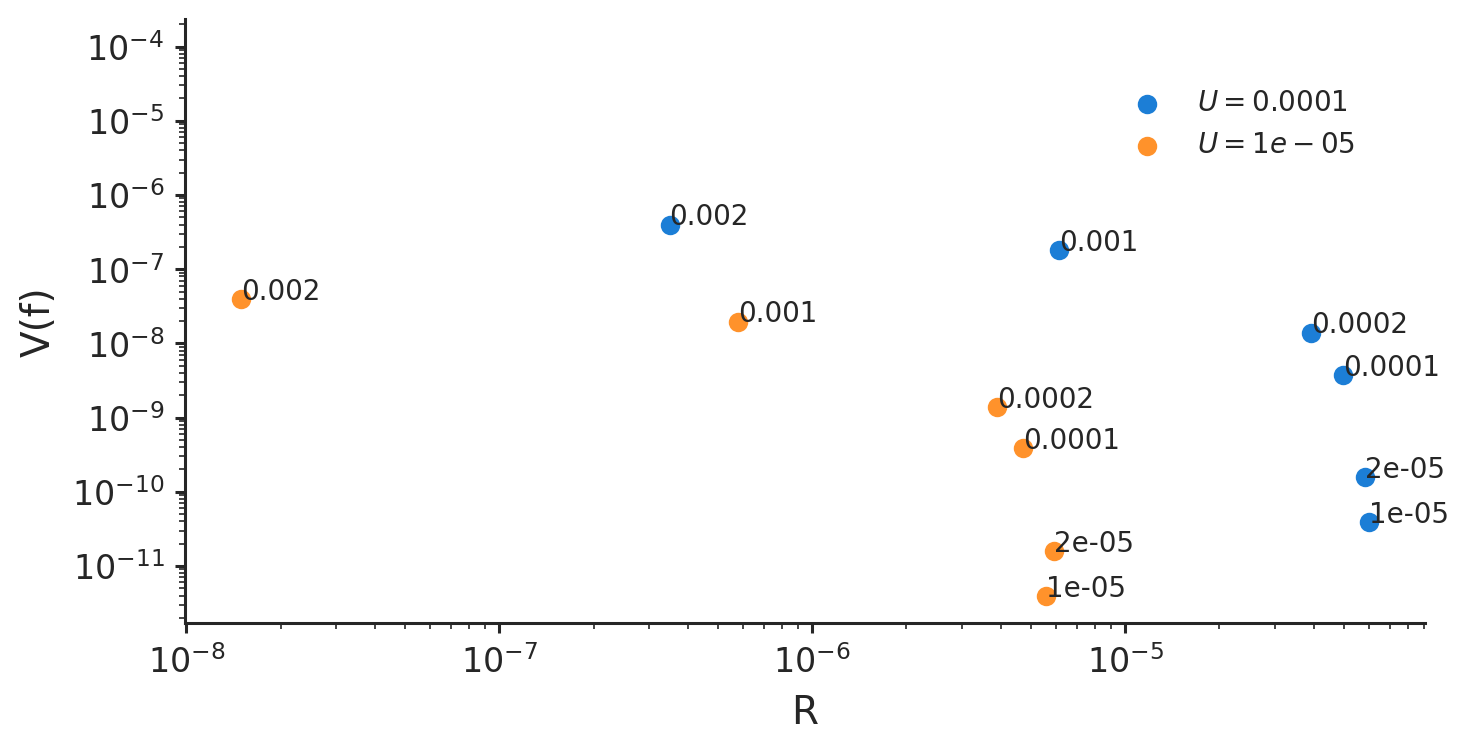

In [322]:
sh = np.logspace(-5, -0.00001, 100)

rf = 1e-8
Us = [1e-4, 1e-5]
N = 1000

for U in Us:
    vga = vg.loc[vg['U'] == U]
    plt.scatter(vga['R'], vga['Vf'], label=f"$U = {U}$")
    R = vga['R'].values
    Vf = vga['Vf'].values
    sh = vga['sh'].values
    for i in range(vga['R'].size):
        plt.annotate(sh[i], (R[i], Vf[i]))
plt.loglog()
plt.ylabel("V(f)")
plt.xlabel("R")
plt.legend()

/home/vsb/projects/bprime/bgspy/theory.py:45: RuntimeWarning: overflow encountered in exp
  start_T = (np.exp(2*sh*N) - 1)/(2*U*sh*N)
/home/vsb/projects/bprime/bgspy/theory.py:51: RuntimeWarning: overflow encountered in exp
  return [np.log((np.exp(2*sh*Ne) - 1)/(2*U*sh*Ne)) - np.log(T),
/home/vsb/projects/bprime/bgspy/theory.py:51: RuntimeWarning: invalid value encountered in double_scalars
  return [np.log((np.exp(2*sh*Ne) - 1)/(2*U*sh*Ne)) - np.log(T),
/home/vsb/projects/bprime/bgspy/theory.py:57: UserWarning: no solution found!
  warnings.warn("no solution found!")
/home/vsb/miniconda3/envs/bprime/lib/python3.8/site-packages/numpy/lib/function_base.py:2246: RuntimeWarning: invalid value encountered in func (vectorized)
  outputs = ufunc(*inputs)
/tmp/ipykernel_51622/2887121203.py:14: RuntimeWarning: divide by zero encountered in true_divide
  T = 1/R
/home/vsb/projects/bprime/bgspy/theory.py:45: RuntimeWarning: overflow encountered in exp
  start_T = (np.exp(2*sh*N) - 1)/(2*U*sh*N)

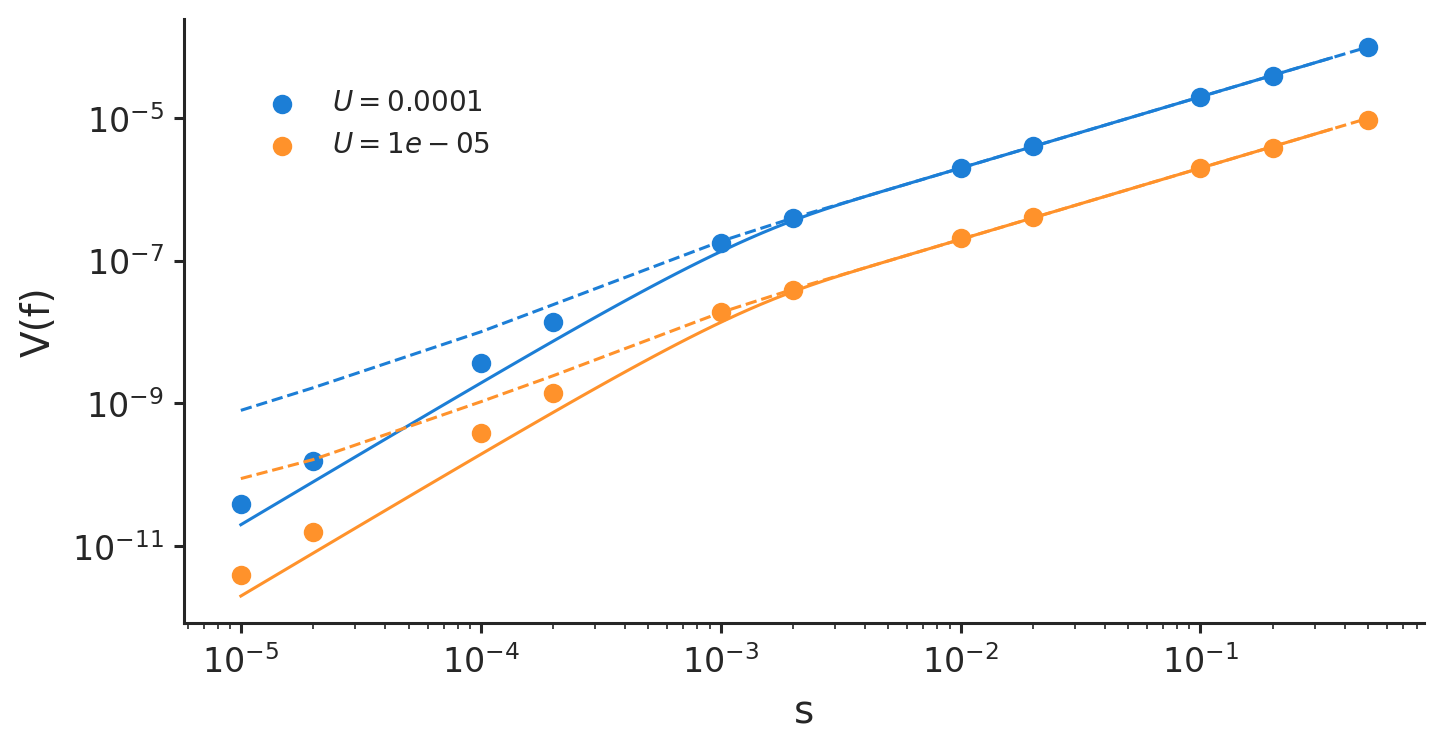

In [358]:
sh = np.logspace(-5, -0.00001, 100)

rf = 1e-8
Us = [1e-4, 1e-5]
N = 1000

for U in Us:
    lines = plt.plot(sh, 2*(U * sh - sh/bgs_segment_sc16(U, sh, 1, rf, N, return_both=True)[0]))
    vga = vg.loc[vg['U'] == U]
    R = vga['R'].values
    s = vga['sh'].values
    idx = np.argsort(s)
    s, R = s[idx], R[idx]
    T = 1/R
    plt.plot(s, 2*(U * s - s/T), c=lines[0].get_color(), linestyle='dashed')
    plt.scatter(vga['sh'], vga['Vf'], label=f"$U = {U}$")

plt.loglog()
plt.ylabel("V(f)")
plt.xlabel("s")
plt.legend()

In [361]:
T

array([  179211.46953405,   168918.91891892,   211864.40677966,
         257069.40874036,  1724137.93103448, 66666666.66666666,
                     inf,               inf,               inf,
                     inf,               inf])

In [348]:
s, T

(array([1.e-05, 2.e-05, 1.e-04, 2.e-04, 1.e-03, 2.e-03]),
 array([   89605.73476703,    84459.45945946,   105932.20338983,
          128534.70437018,   862068.96551724, 33333333.33333333]))

/home/vsb/projects/bprime/bgspy/theory.py:45: RuntimeWarning: overflow encountered in exp
  start_T = (np.exp(2*sh*N) - 1)/(2*U*sh*N)
/home/vsb/projects/bprime/bgspy/theory.py:51: RuntimeWarning: overflow encountered in exp
  return [np.log((np.exp(2*sh*Ne) - 1)/(2*U*sh*Ne)) - np.log(T),
/home/vsb/projects/bprime/bgspy/theory.py:51: RuntimeWarning: invalid value encountered in double_scalars
  return [np.log((np.exp(2*sh*Ne) - 1)/(2*U*sh*Ne)) - np.log(T),
/home/vsb/projects/bprime/bgspy/theory.py:57: UserWarning: no solution found!
  warnings.warn("no solution found!")
/home/vsb/miniconda3/envs/bprime/lib/python3.8/site-packages/numpy/lib/function_base.py:2246: RuntimeWarning: invalid value encountered in func (vectorized)
  outputs = ufunc(*inputs)
/home/vsb/projects/bprime/bgspy/theory.py:45: RuntimeWarning: overflow encountered in exp
  start_T = (np.exp(2*sh*N) - 1)/(2*U*sh*N)
/home/vsb/projects/bprime/bgspy/theory.py:51: RuntimeWarning: overflow encountered in exp
  return [np.log

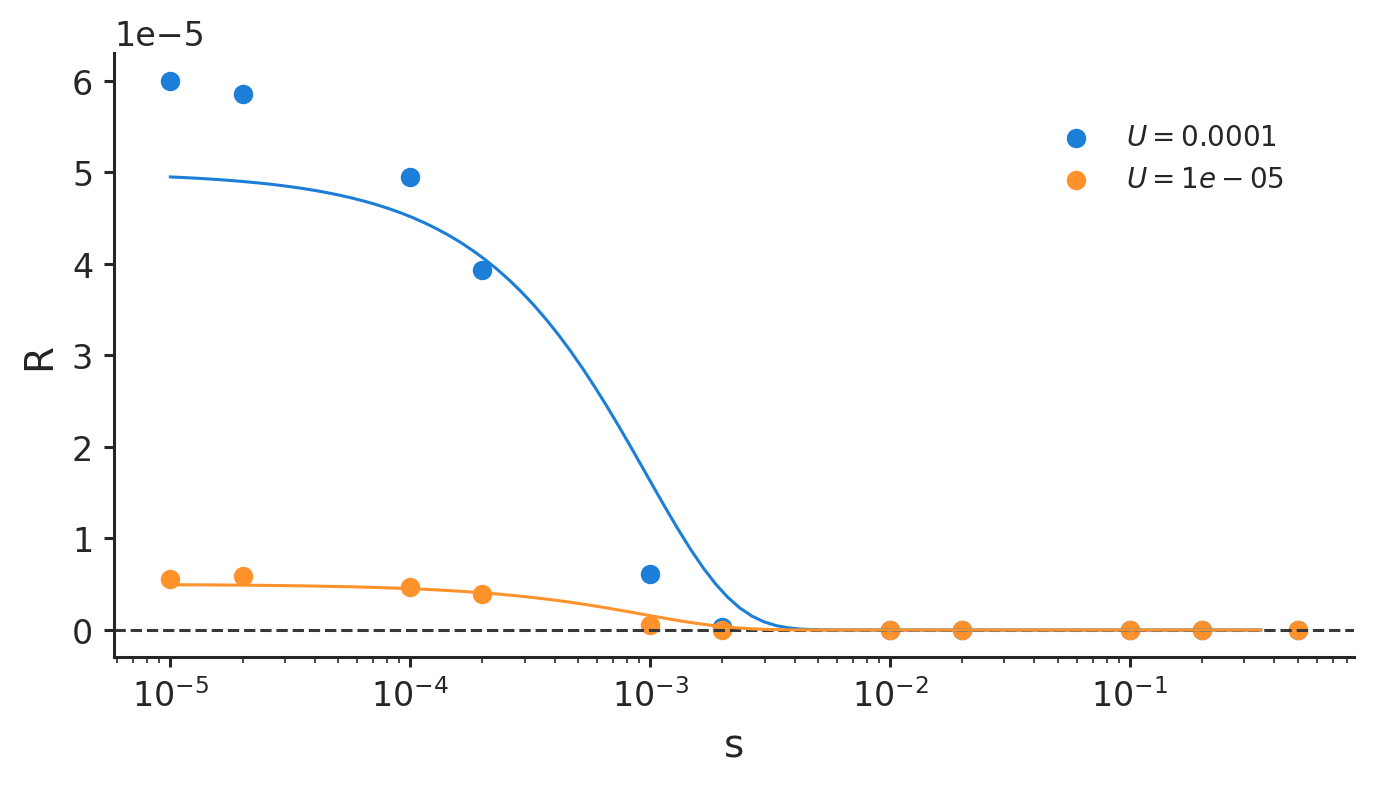

In [271]:
sh = np.logspace(-5, -0.00001, 100)

rf = 1e-8
Us = [1e-4, 1e-5]
N = 1000

plt.axhline(0, c='0.22', linestyle='dashed')
for U in Us:
    lines = plt.plot(sh, 0.5/bgs_segment_sc16(U, sh, 1, rf, N, return_both=True)[0])
    vga = vg.loc[vg['U'] == U]
    plt.scatter(vga['sh'], vga['R'], label=f"$U = {U}$")

plt.semilogx()
plt.ylabel("R")
plt.xlabel("s")
plt.legend()

In [277]:
vg

,key,mu,sh,L,rbp,rf,rep,theory,Vf,U,R
0,validate_N1000_mu1e-08_sh0.0001_rf1e-09_rbp1e-...,1.000000e-08,0.00010,10000.0,1.000000e-08,1.000000e-09,4999.5,0.606520,3.693041e-09,0.00010,4.951000e-05
1,validate_N1000_mu1e-08_sh0.0002_rf1e-09_rbp1e-...,1.000000e-08,0.00020,10000.0,1.000000e-08,1.000000e-09,4999.5,0.716517,1.382924e-08,0.00010,3.931000e-05
2,validate_N1000_mu1e-08_sh0.001_rf1e-09_rbp1e-0...,1.000000e-08,0.00100,10000.0,1.000000e-08,1.000000e-09,4999.5,0.913093,1.801830e-07,0.00010,6.150000e-06
3,validate_N1000_mu1e-08_sh0.002_rf1e-09_rbp1e-0...,1.000000e-08,0.00200,10000.0,1.000000e-08,1.000000e-09,4999.5,0.953493,3.982639e-07,0.00010,3.500000e-07
4,validate_N1000_mu1e-08_sh0.01_rf1e-09_rbp1e-08...,1.000000e-08,0.01000,10000.0,1.000000e-08,1.000000e-09,4999.5,0.990147,1.985319e-06,0.00010,0.000000e+00
5,validate_N1000_mu1e-08_sh0.02_rf1e-09_rbp1e-08...,1.000000e-08,0.02000,10000.0,1.000000e-08,1.000000e-09,4999.5,0.995037,4.068977e-06,0.00010,0.000000e+00
6,validate_N1000_mu1e-08_sh0.1_rf1e-09_rbp1e-08_...,1.000000e-08,0.10000,10000.0,1.000000e-08,1.000000e-09,4999.5,0.999001,2.009529e-05,0.00010,0.000000e+00
7,validate_N1000_mu1e-08_sh0.2_rf1e-09_rbp1e-08_...,1.000000e-08,0.20000,10000.0,1.000000e-08,1.000000e-09,4999.5,0.999500,3.957901e-05,0.00010,0.000000e+00
8,validate_N1000_mu1e-08_sh0.5_rf1e-09_rbp1e-08_...,1.000000e-08,0.50000,10000.0,1.000000e-08,1.000000e-09,4999.5,0.999800,9.893746e-05,0.00010,0.000000e+00
9,validate_N1000_mu1e-08_sh1e-05_rf1e-09_rbp1e-0...,1.000000e-08,0.00001,10000.0,1.000000e-08,1.000000e-09,4999.5,0.402927,3.892624e-11,0.00010,5.999000e-05


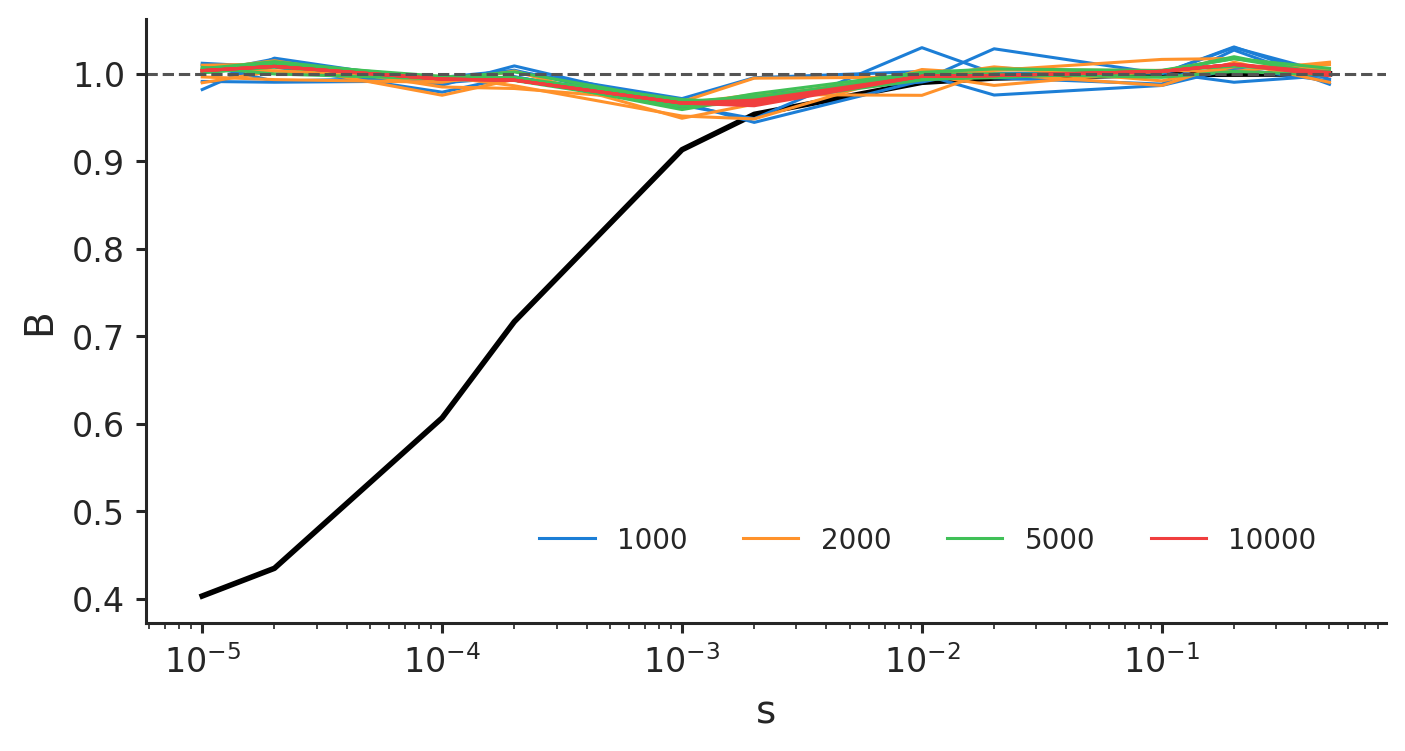

In [51]:
#ns = [50, 100, 500, 1000, 5000, 10_000]
ns = [1000, 2000, 5000, 10_000]
plot_subsamples(vd.loc[(vd.mu == 1e-8)], ns)

(0.9, 1.03)

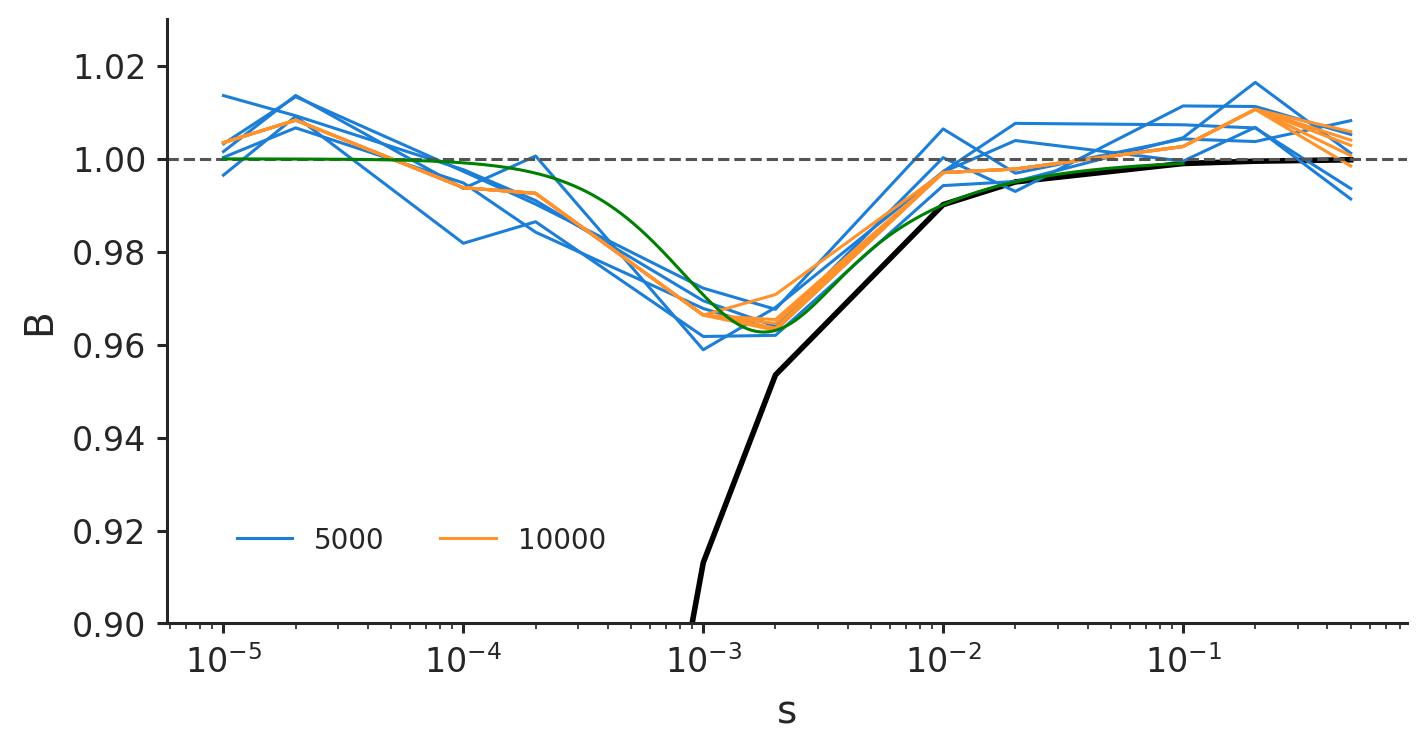

In [174]:
from scipy.optimize import fsolve

@np.vectorize
def bgs_segment_sc16(mu, sh, L, r, N, full_output=False):
    U = L*mu
    G = L*r
    Vm = U*sh**2
    #print(U, G, np.exp((-2*U / (2*sh + G))))
    start_T = (np.exp(2*sh*N) - 1)/(2*U*sh*N)
    def func(x):
        T, Ne = x
        V = U*sh - sh/T
        Q2 = 1/((Vm/V) * (Vm/V + G/2))
        return [np.log((np.exp(2*sh*Ne) - 1)/(2*U*sh*Ne)) - np.log(T),
                 np.log(N * np.exp(-V*Q2)) - np.log(Ne)]
    out = fsolve(func, [start_T, N], full_output=True)
    if full_output:
        return out
    return out[0][1]

plot_subsamples(vd.loc[(vd.mu == 1e-8)], [5000, 10_000])

sh = np.logspace(-5, -1, 1000)
sc16 = bgs_segment_sc16(1e-8, sh, 10000, 1e-8, 1000)
plt.plot(sh, sc16/1000, c='g')

plt.ylim(0.9, 1.03)

(0.9, 1.03)

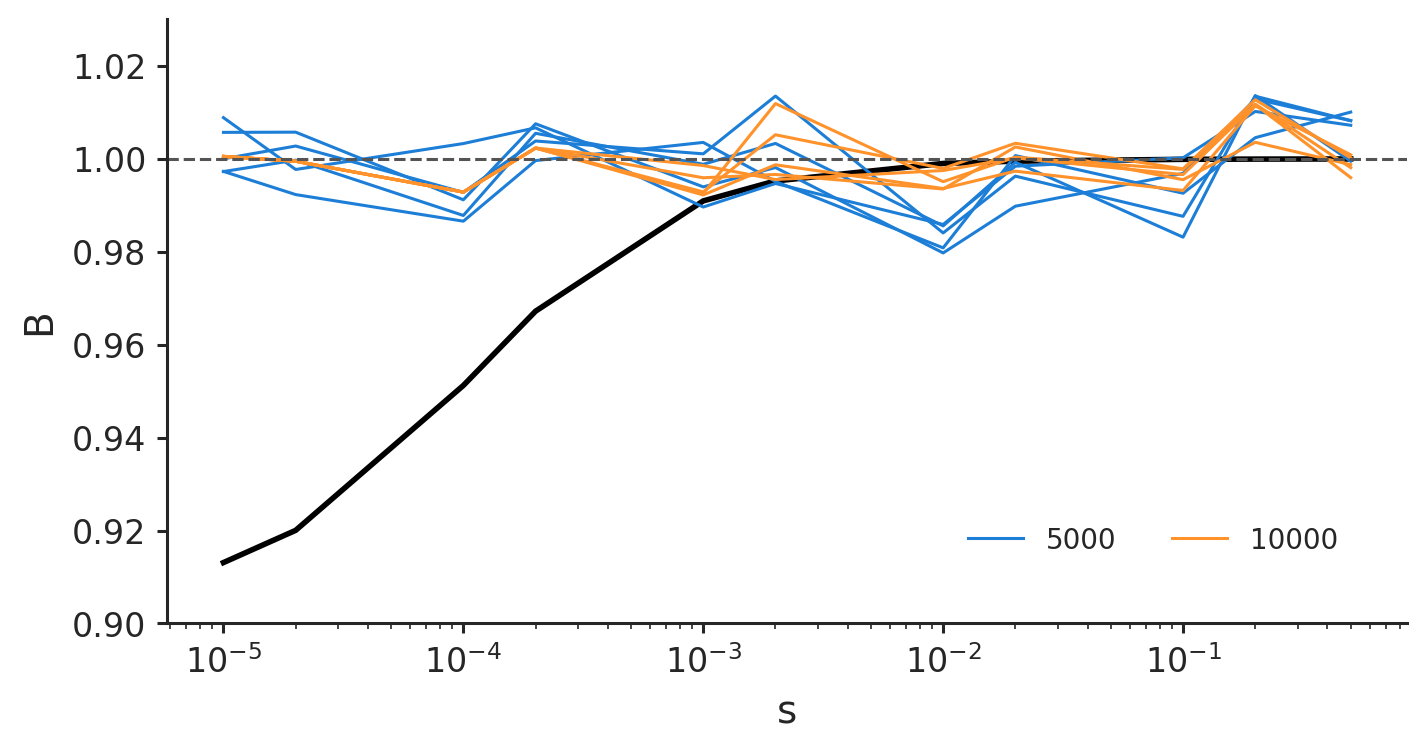

In [55]:
plot_subsamples(vd.loc[(vd.mu == 1e-9)], [5000, 10_000])
plt.ylim(0.9, 1.03)

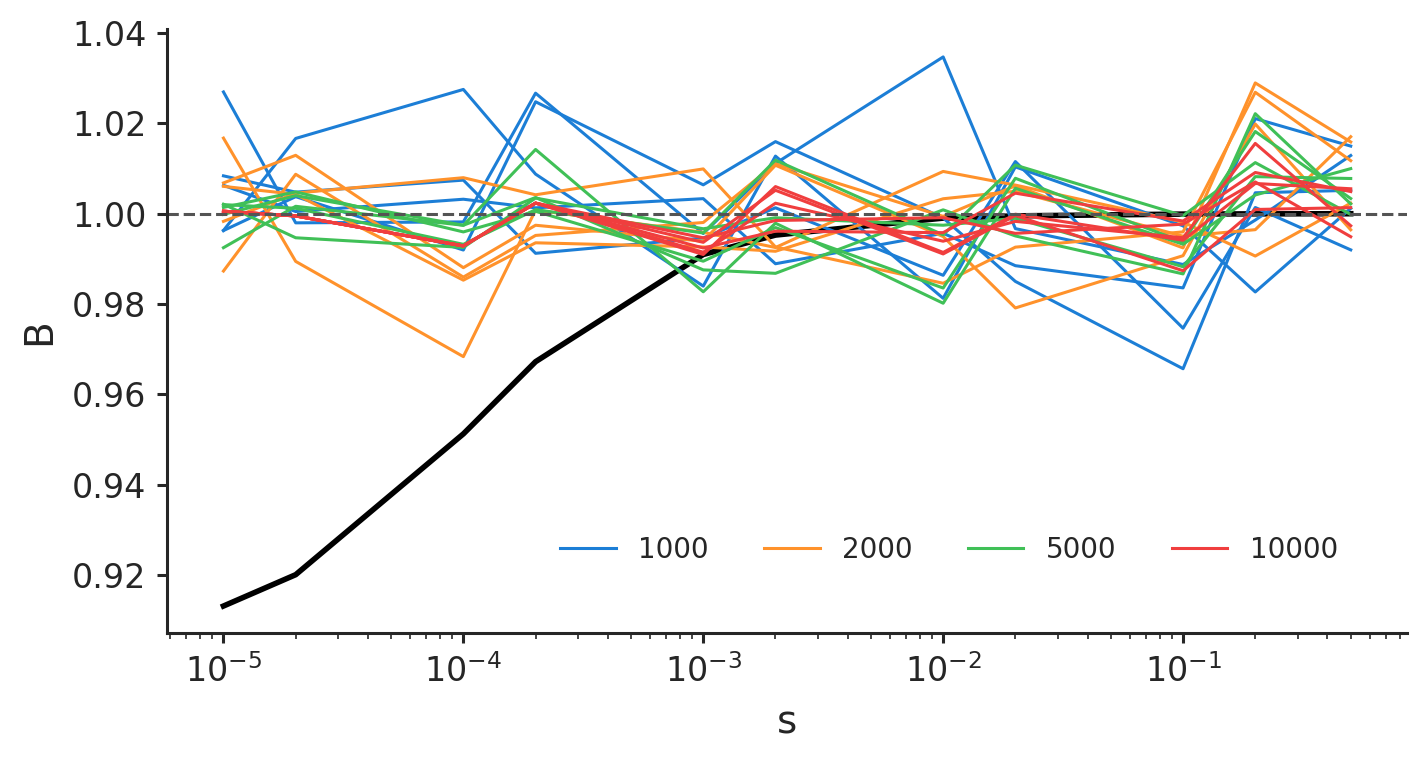

In [17]:
plot_subsamples(vd.loc[(vd.mu == 1e-9)], ns)

## Dimensionality Reduction

In [113]:
vd = load_validation('../data/slim_sims/validate_dim/validate_dim.npz')

# fix for annoying upstream bug 
vd['key'] = [k.replace('.json', '') for k in vd['key']]

vd_means = group_means(vd)

vd['muL'] = [str(signif(v, 2)) for v in vd['mu']*vd['L']]
vd = vd.sort_values(['muL'])

vd_means['muL'] = [str(signif(v, 2)) for v in vd_means['mu']*vd_means['L']]
vd_means = vd_means.sort_values(['muL'])

[]

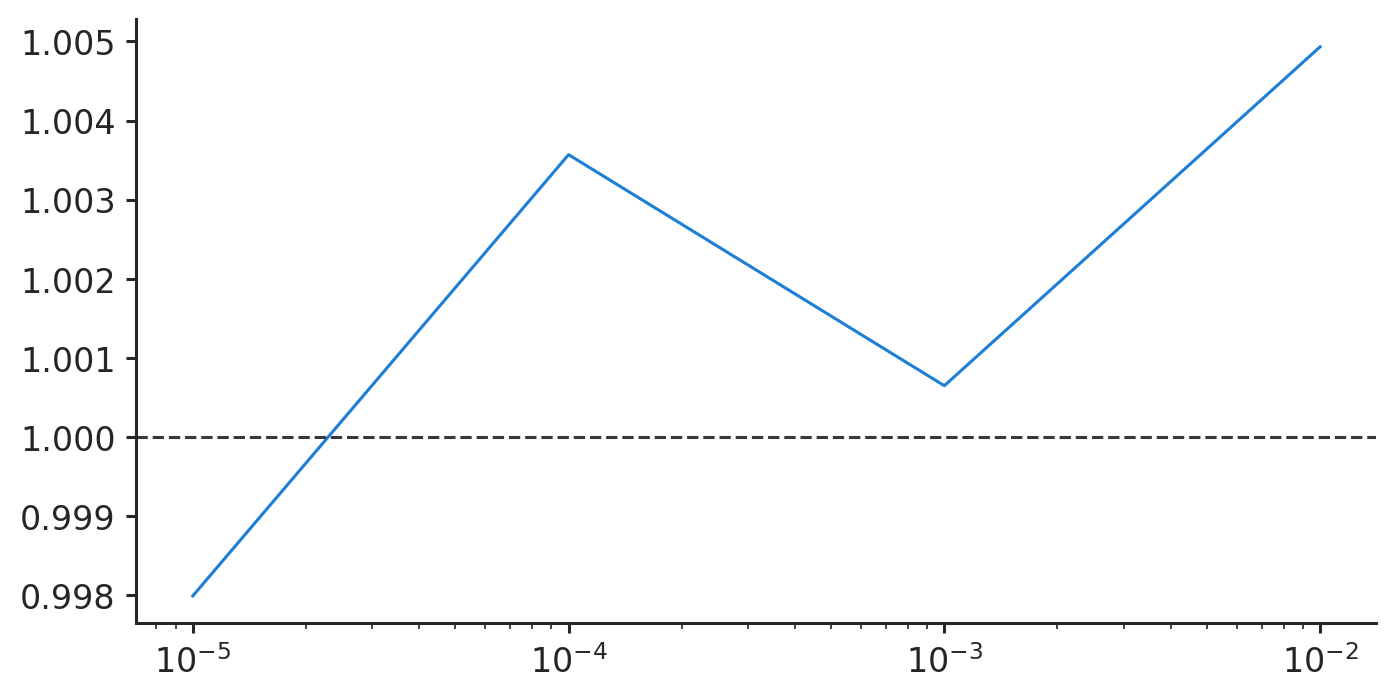

In [133]:
dd = group_means(vd.loc[(vd.mu == 1e-9) & (vd.L == 10_000)])

plt.plot(dd['sh'], dd['y'])
plt.axhline(1, linestyle='dashed', c='0.22')
plt.semilogx()

[]

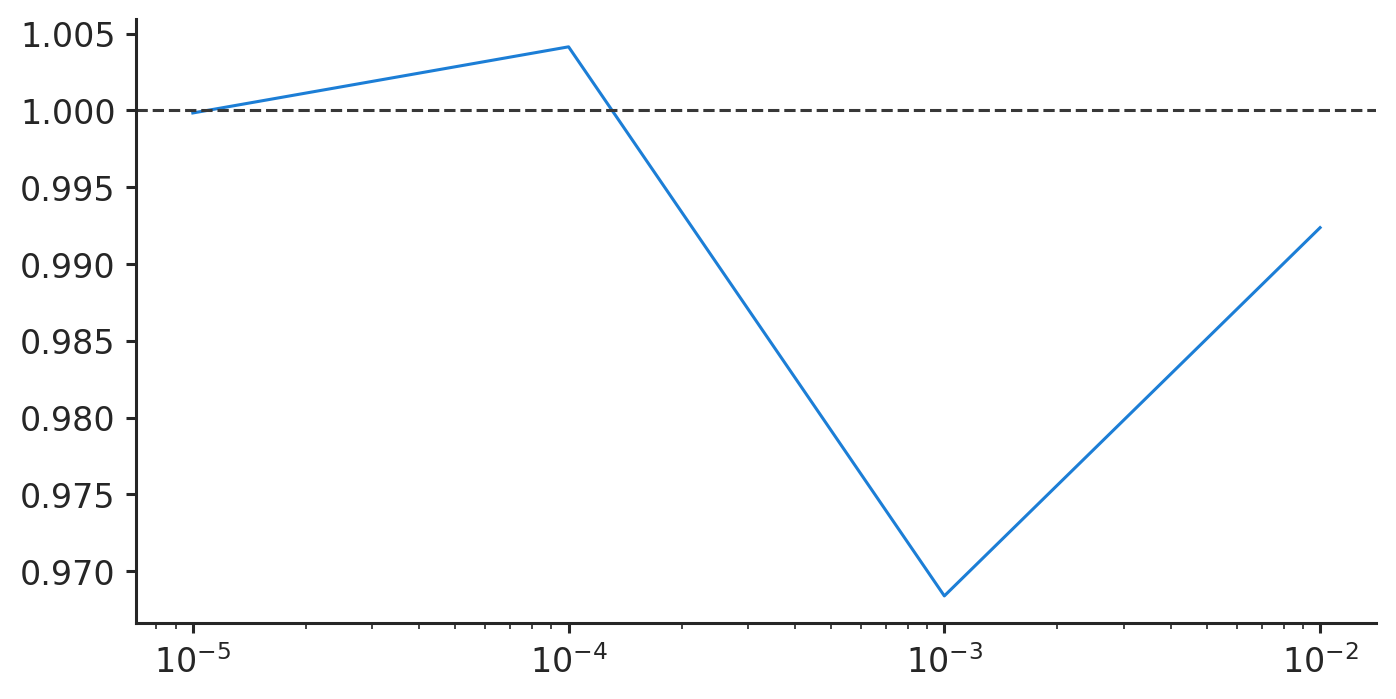

In [153]:
dd = group_means(vd.loc[(vd.mu == 1e-8) & (vd.L == 10_000)])

plt.plot(dd['sh'], dd['y'])
plt.axhline(1, linestyle='dashed', c='0.22')
plt.semilogx()

Using Chebychef, what are the error bounds?

Text(0.5, 0, 'ε')

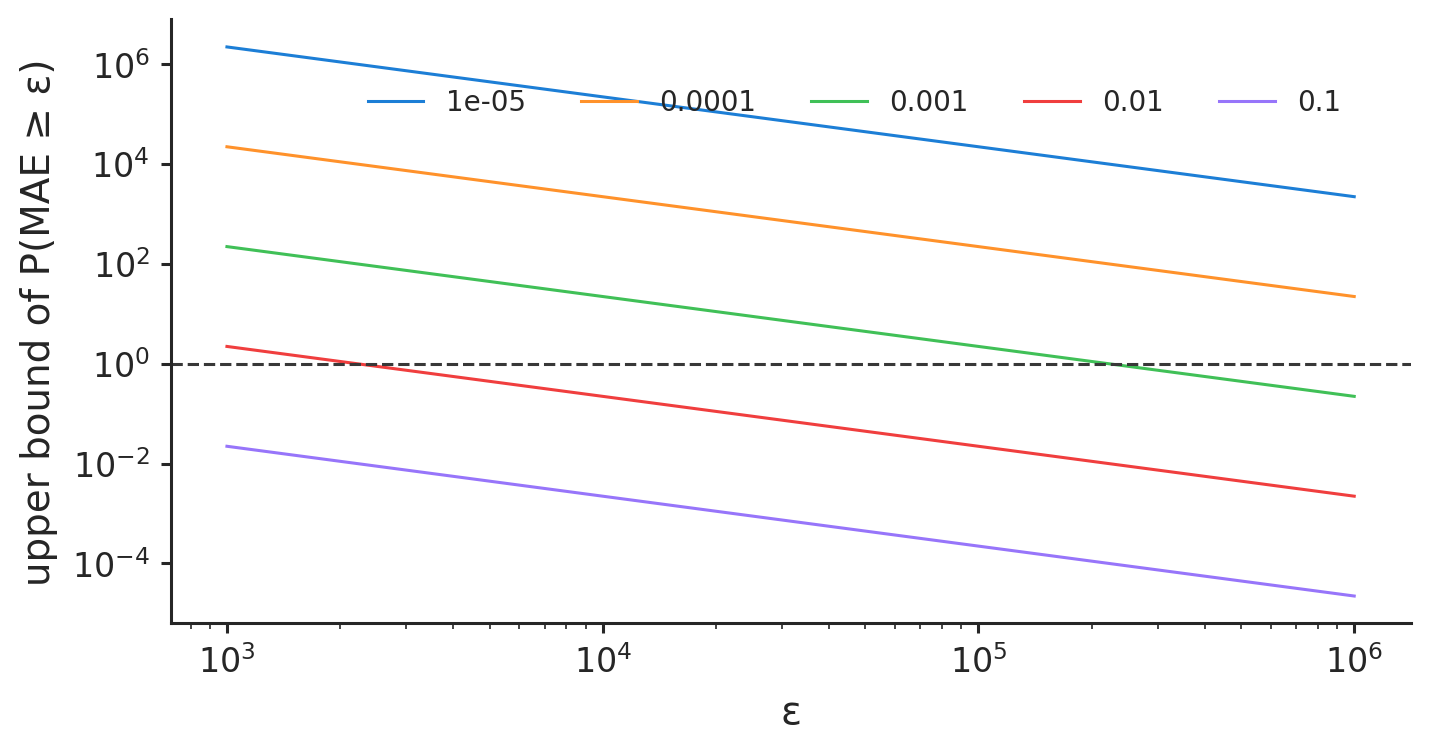

In [148]:
r = np.array([1000, 5000, 10_000, 50_000, 100_000, 1_000_000])
for eps in np.logspace(-5, -1, 5):
    plt.plot(r, 2/(9*r*eps**2), label=eps)
    plt.loglog()
plt.axhline(1, linestyle='dashed', c='0.22')
plt.legend(ncol=5)
plt.ylabel('upper bound of P(MAE ≥ ε)')
plt.xlabel('ε')

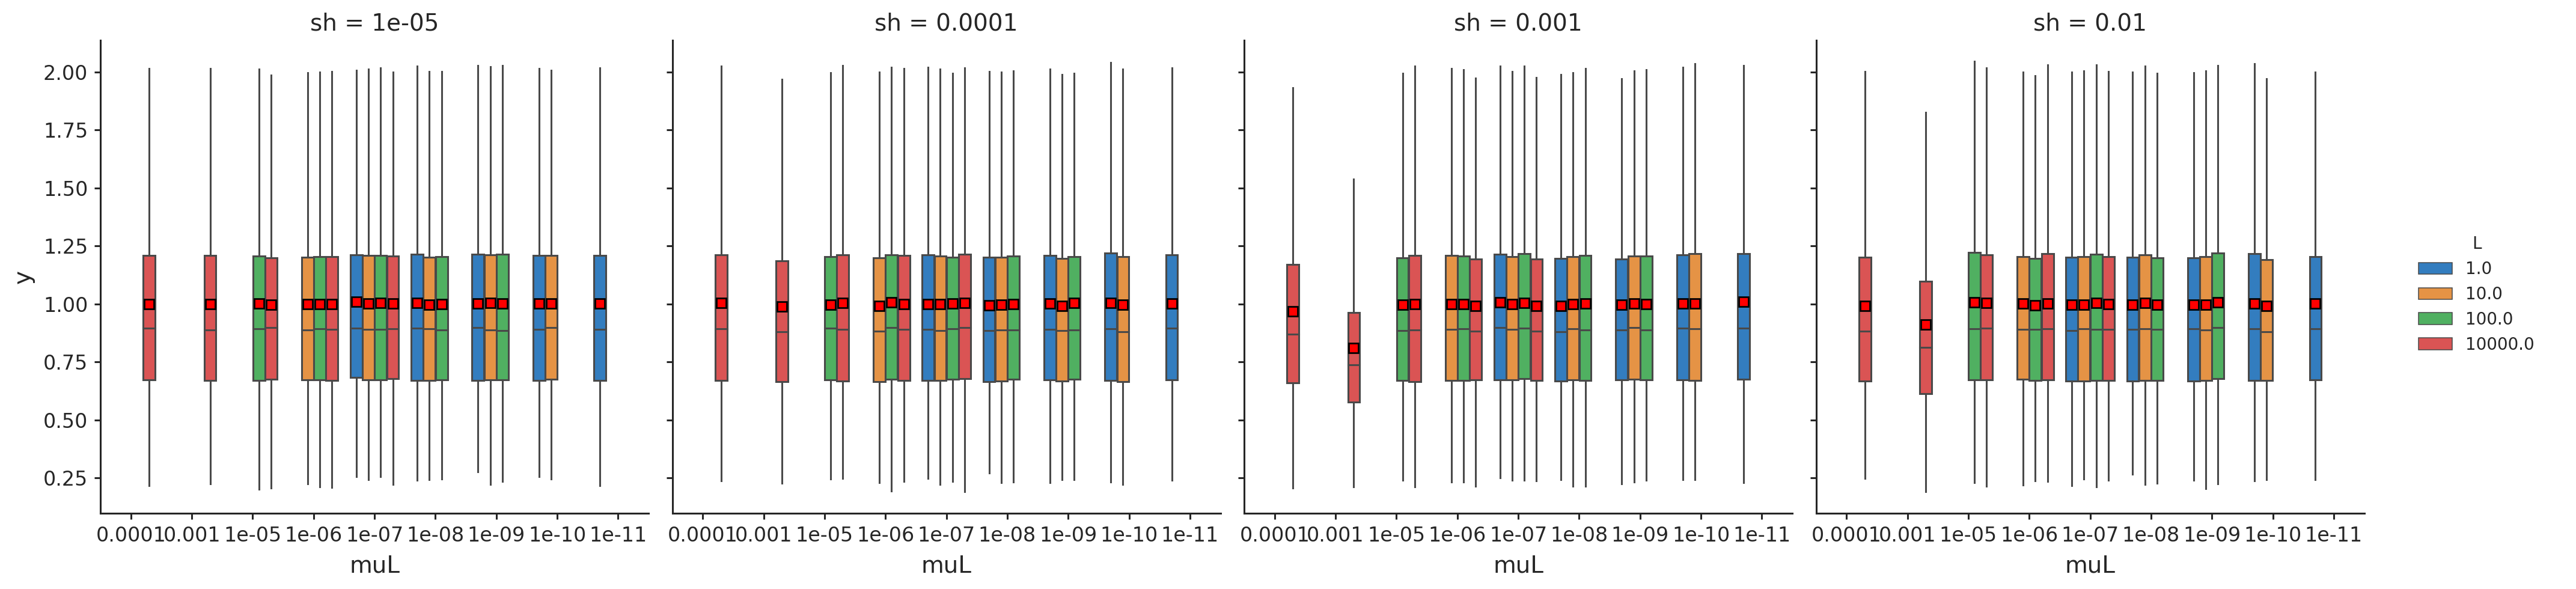

In [119]:
sns.catplot(x='muL', y='y', hue='L', data=vd, col='sh', kind='box', showmeans=True)

(0.95, 1.03)

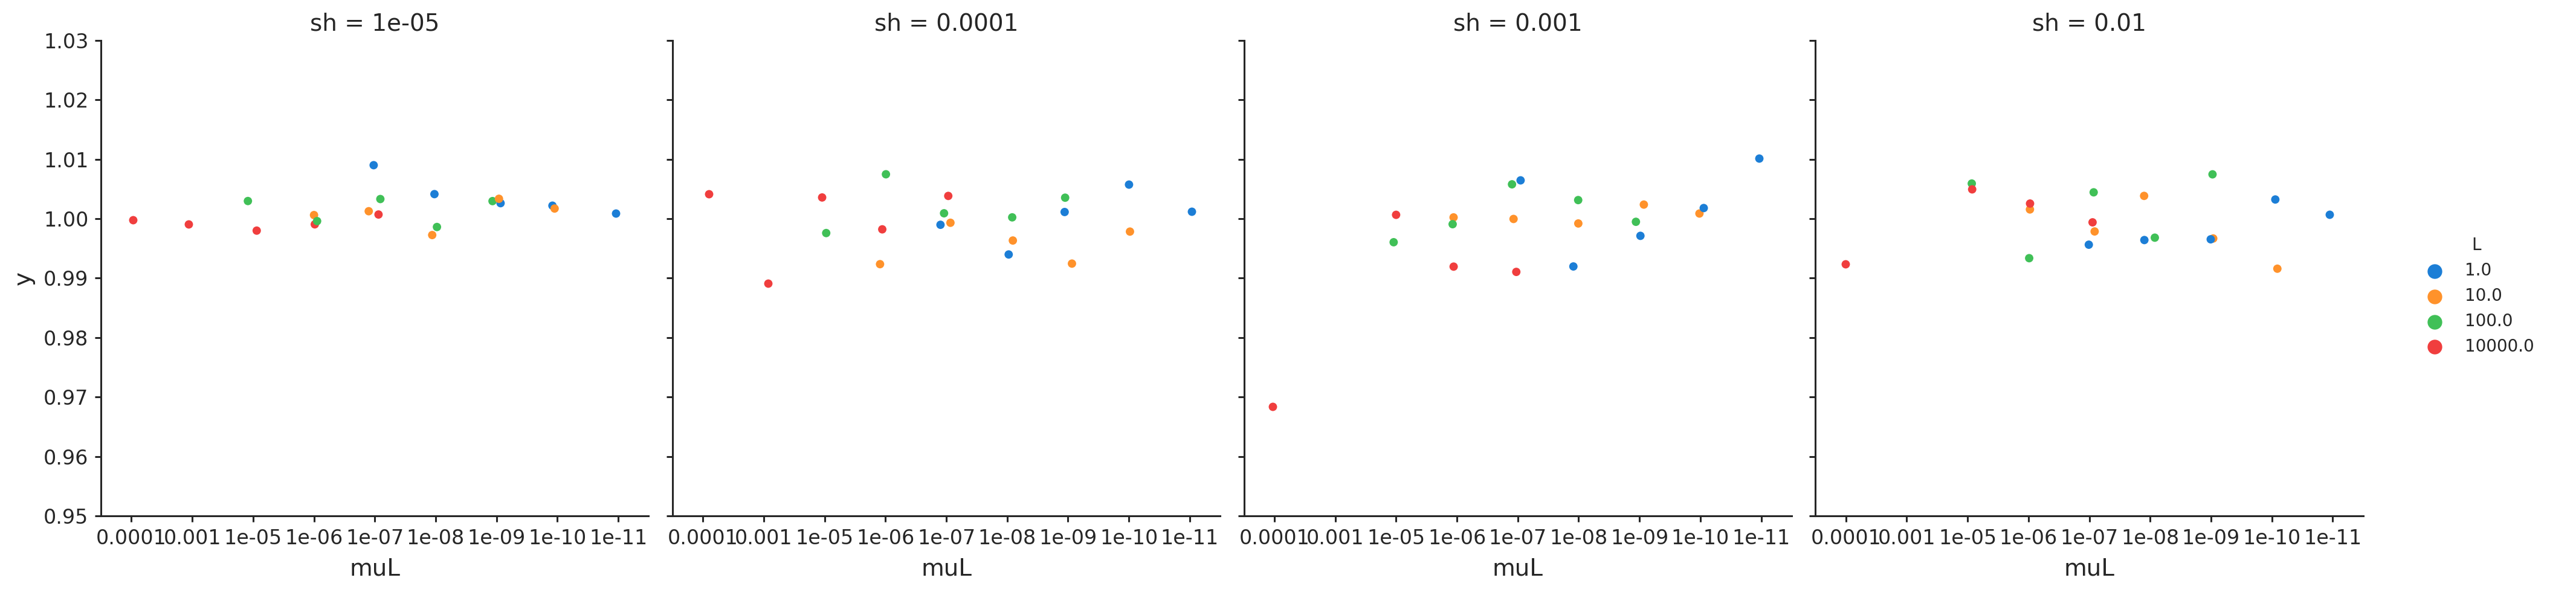

In [120]:
sns.catplot(x='muL', y='y', hue='L', data=vd_means, col='sh')
plt.ylim(0.95, 1.03)

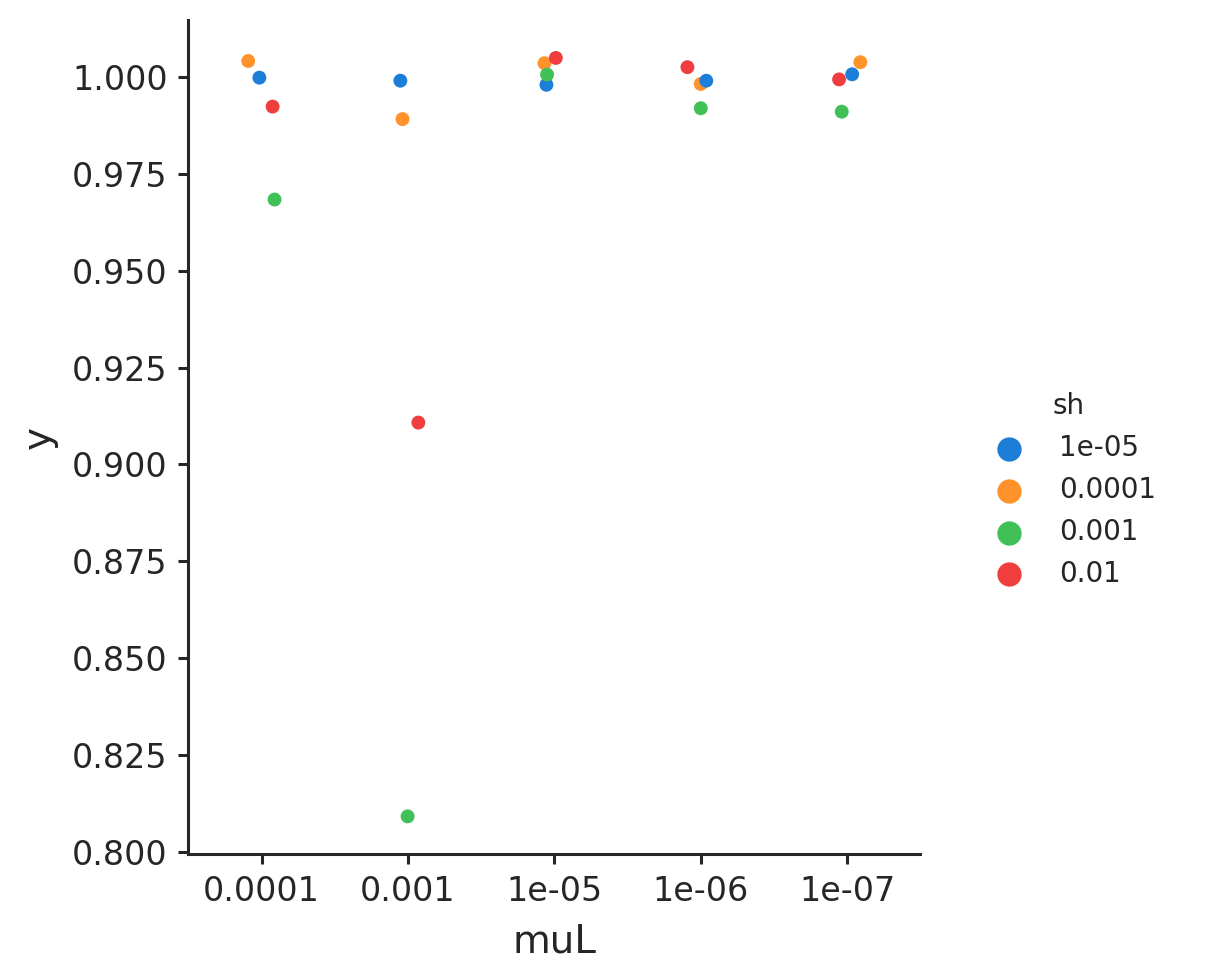

In [121]:
sns.catplot(x='muL', y='y', hue='sh', data=vd_means.loc[vd_means['L'] == 10_000])

## Recombination in the Segment

In [56]:
vd = load_validation('../data/slim_sims/validate_rbp/validate_rbp.npz')

In [59]:
vd['rbp'].unique()

array([1.e-09, 1.e-10, 1.e-07, 1.e-08])

<AxesSubplot:xlabel='sh', ylabel='y'>

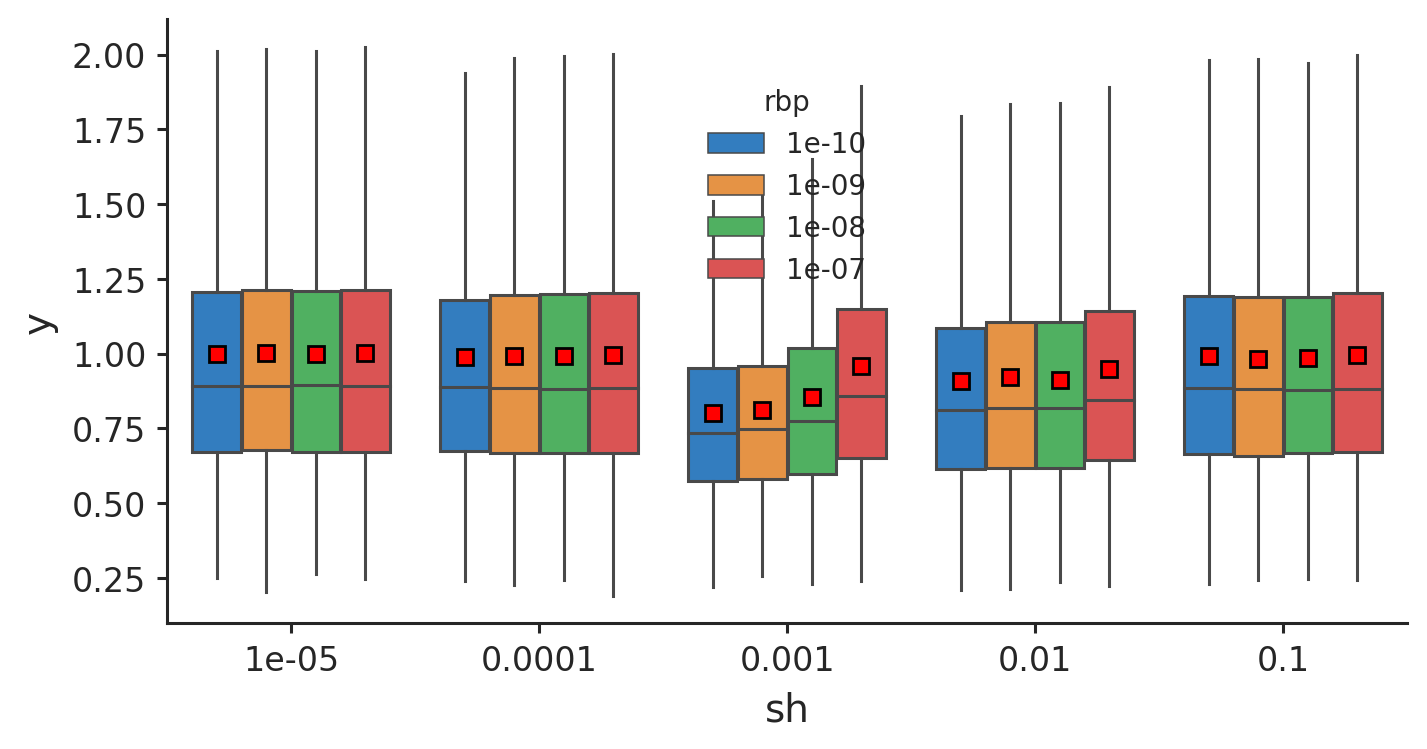

In [63]:
sns.boxplot(x='sh', y='y', hue='rbp', data=vd, showmeans=True)

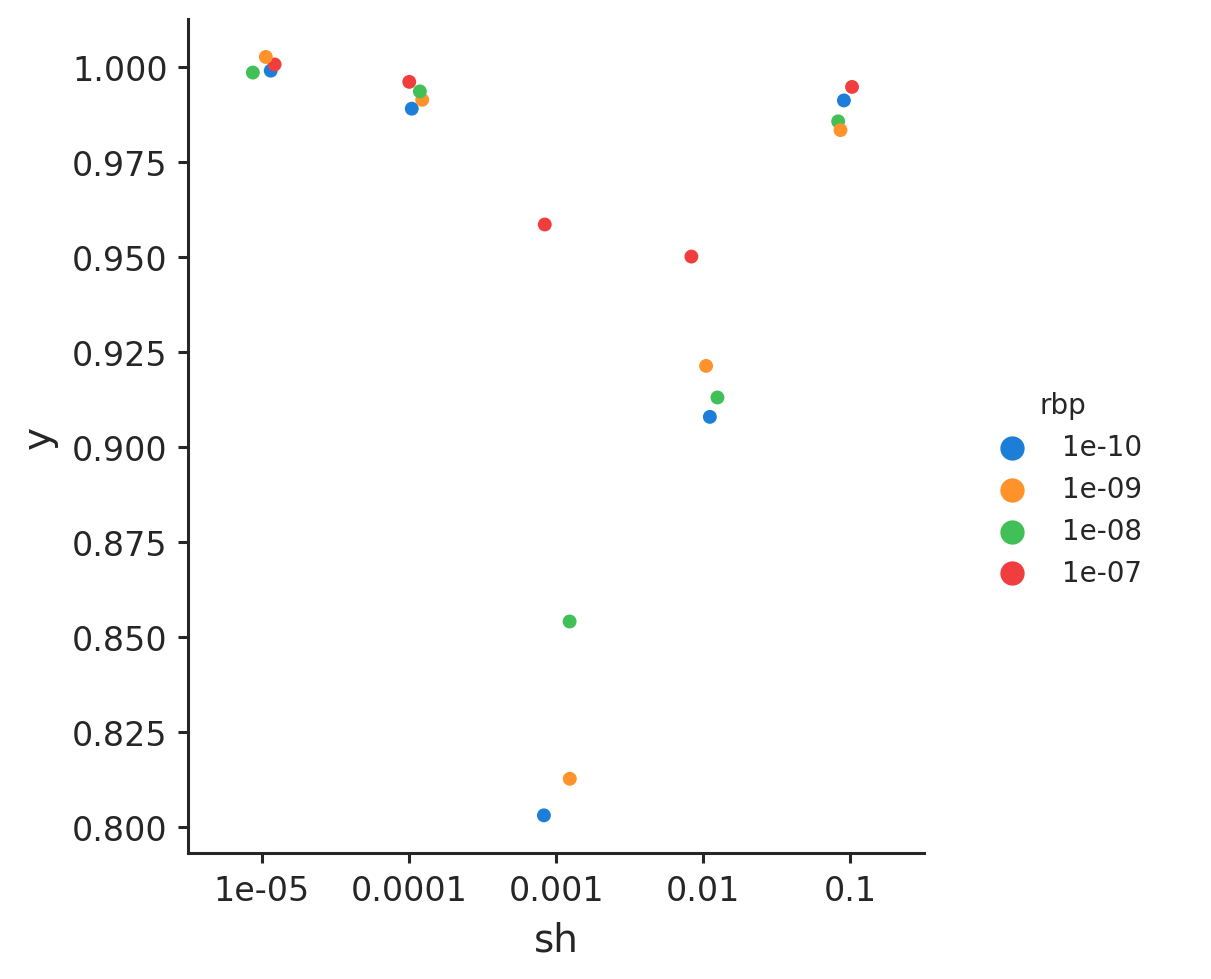

In [70]:
vd_means = group_means(vd)
vd_means['rbp'] = [signif(x, 2) for x in vd_means['rbp']]
sns.catplot(x='sh', y='y', hue='rbp', data=vd_means)